In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:
#Merge BB100 with Spotify Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')
bb100_features.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
11977,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,89,Blue Boy,Jim Reeves,Blue BoyJim Reeves,1,NaN,89,1,Jim Reeves,Blue Boy,"['adult standards', 'nashville sound', 'rock-and-roll']",05k40oRJ58mQBJSAz0FkLI,https://p.scdn.co/mp3-preview/80d3e13c406f8251e5bee84366353b09f630dfff?cid=b8d3901151d34489a160e3cf0ab1fa94,129333.0,0.0,The Essential Jim Reeves,0.613,0.372,0.0,-13.051,1.0,0.0299,0.7850,0.00154,0.115,0.697,98.549,4.0,24.0
1014,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And The Rebels,1,NaN,6,1,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263155,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,70,Quicksand,Morray,QuicksandMorray,1,66.0,65,15,Morray,Quicksand,[],4iCZ6Cr76For1TuHUQ90r8,https://p.scdn.co/mp3-preview/5145f491144ef1468d624cfc0203c2d22ba896dc?cid=b8d3901151d34489a160e3cf0ab1fa94,224933.0,1.0,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/44vREmJC0OlVZjZaGLqVEd'}, 'href': 'https://api.spotify.com/v1/artists/44vREmJC0OlVZjZaGLqVEd', 'i...",0.901,0.656,4.0,-7.452,0.0,0.2770,0.0807,0.00000,0.181,0.599,119.956,4.0,71.0
7816,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,28,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,1,NaN,28,1,J. Cole & Bas,hunger.on.hillside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_genre = bb100_features[['SongID', 'spotify_genre']]
df_genre

,SongID,spotify_genre
0,Don't Just Stand TherePatty Duke,['deep adult standards']
1,Don't Just Stand TherePatty Duke,['deep adult standards']
2,Don't Just Stand TherePatty Duke,['deep adult standards']
3,Don't Just Stand TherePatty Duke,['deep adult standards']
4,Don't Just Stand TherePatty Duke,['deep adult standards']
...,...,...
330456,God Is A WomanAriana Grande,"['dance pop', 'pop', 'post-teen pop']"
330457,I Wanna Get Next To YouRose Royce,"['classic soul', 'disco', 'funk', 'motown', 'post-disco', 'quiet storm', 'soul']"
330458,I Can't Stand ItEric Clapton And His Band,NaN
330459,Here I Am Come & Take MeAl Green,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']"


In [7]:
df_genre.isnull().sum()

SongID               0
spotify_genre    14586
dtype: int64

In [8]:
df_genre['spotify_genre'].value_counts()

[]                                                                                             23065
['contemporary country', 'country', 'country road']                                             5347
['contemporary country', 'country', 'country road', 'modern country rock']                      4742
['dance pop', 'pop', 'post-teen pop']                                                           3782
['dance pop', 'pop']                                                                            1552
                                                                                               ...  
['dance pop', 'europop', 'neo mellow', 'new wave pop']                                             1
['indie pop', 'indie rock', 'indietronica', 'modern rock', 'seattle indie']                        1
['downtempo', 'edm', 'electronic trap', 'electropop', 'pop', 'post-teen pop', 'shiver pop']        1
['talent show']                                                                            

In [9]:
df_genre['spotify_genre'].replace({"[]":np.nan}, inplace=True)
#df_genre['spotify_genre'].value_counts()
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SongID               0
spotify_genre    37651
dtype: int64

In [10]:
df_genre.dropna(subset=['spotify_genre'], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
df_genre.isnull().sum()

SongID           0
spotify_genre    0
dtype: int64

In [12]:
df_genre

,SongID,spotify_genre
0,Don't Just Stand TherePatty Duke,['deep adult standards']
1,Don't Just Stand TherePatty Duke,['deep adult standards']
2,Don't Just Stand TherePatty Duke,['deep adult standards']
3,Don't Just Stand TherePatty Duke,['deep adult standards']
4,Don't Just Stand TherePatty Duke,['deep adult standards']
...,...,...
330453,Don't You CareThe Buckinghams,"['brill building pop', 'bubblegum pop', 'classic garage rock', 'folk rock', 'merseybeat']"
330454,KiddioBrook Benton,"['adult standards', 'brill building pop', 'motown', 'rhythm and blues', 'rock-and-roll', 'soul', 'southern soul']"
330456,God Is A WomanAriana Grande,"['dance pop', 'pop', 'post-teen pop']"
330457,I Wanna Get Next To YouRose Royce,"['classic soul', 'disco', 'funk', 'motown', 'post-disco', 'quiet storm', 'soul']"


In [13]:
Songs = df_genre.SongID

In [14]:
Songs

0          Don't Just Stand TherePatty Duke
1          Don't Just Stand TherePatty Duke
2          Don't Just Stand TherePatty Duke
3          Don't Just Stand TherePatty Duke
4          Don't Just Stand TherePatty Duke
                        ...                
330453        Don't You CareThe Buckinghams
330454                   KiddioBrook Benton
330456          God Is A WomanAriana Grande
330457    I Wanna Get Next To YouRose Royce
330459     Here I Am Come & Take MeAl Green
Name: SongID, Length: 292810, dtype: object

In [15]:
#Noticing that Spotify_Genre Values is an Array
arr = df_genre['spotify_genre'].values

In [16]:
#Important Conversion to list of genres for items in Array
out = [i.replace('\'', '').replace('[','').replace(']','').replace('"','').split(", ") for i in arr]

In [17]:
#Apply "Explode" on new Dataframe with Key Inputs: 
Genres_Explode = pd.DataFrame({'SongID':Songs, 'Genres':out}).explode('Genres')

In [18]:
#View Result of Exploding
Genres_Explode

,SongID,Genres
0,Don't Just Stand TherePatty Duke,deep adult standards
1,Don't Just Stand TherePatty Duke,deep adult standards
2,Don't Just Stand TherePatty Duke,deep adult standards
3,Don't Just Stand TherePatty Duke,deep adult standards
4,Don't Just Stand TherePatty Duke,deep adult standards
...,...,...
330459,Here I Am Come & Take MeAl Green,memphis soul
330459,Here I Am Come & Take MeAl Green,quiet storm
330459,Here I Am Come & Take MeAl Green,soul
330459,Here I Am Come & Take MeAl Green,soul blues


In [19]:
#Group By Genres and Count
Genres_Explode.groupby('Genres').count().sort_values(by='SongID', ascending=False)

,SongID
Genres,
dance pop,48245
mellow gold,47410
soft rock,46859
pop,46327
rock,39336
...,...
chicago punk,1
chicago hardcore,1
jazz pop,1


In [20]:
Genres_Explode['Genres'].value_counts()

dance pop           48245
mellow gold         47410
soft rock           46859
pop                 46327
rock                39336
                    ...  
western swing           1
arkansas hip hop        1
k-rap                   1
vapor pop               1
chicago punk            1
Name: Genres, Length: 1145, dtype: int64

In [21]:
#Group By Genres and Count
new = Genres_Explode.groupby('Genres').count().sort_values(by='SongID', ascending=False)

In [22]:
new

,SongID
Genres,
dance pop,48245
mellow gold,47410
soft rock,46859
pop,46327
rock,39336
...,...
chicago punk,1
chicago hardcore,1
jazz pop,1


In [23]:
new.index

Index(['dance pop', 'mellow gold', 'soft rock', 'pop', 'rock',
       'adult standards', 'pop rap', 'album rock', 'urban contemporary',
       'brill building pop',
       ...
       'japanese singer-songwriter', 'british country', 'singaporean pop',
       'vallenato', 'vapor pop', 'chicago punk', 'chicago hardcore',
       'jazz pop', 'champeta', 'bc underground hip hop'],
      dtype='object', name='Genres', length=1145)

In [24]:
new = new.reset_index()

In [25]:
new

,Genres,SongID
0,dance pop,48245
1,mellow gold,47410
2,soft rock,46859
3,pop,46327
4,rock,39336
...,...,...
1140,chicago punk,1
1141,chicago hardcore,1
1142,jazz pop,1
1143,champeta,1


In [26]:
new['SongID']

0       48245
1       47410
2       46859
3       46327
4       39336
        ...  
1140        1
1141        1
1142        1
1143        1
1144        1
Name: SongID, Length: 1145, dtype: int64

In [27]:
new['SongID'][:5]

0    48245
1    47410
2    46859
3    46327
4    39336
Name: SongID, dtype: int64

In [28]:
new_top_10 = new[0:10]

In [29]:
new_top_10

,Genres,SongID
0,dance pop,48245
1,mellow gold,47410
2,soft rock,46859
3,pop,46327
4,rock,39336
5,adult standards,36223
6,pop rap,34019
7,album rock,29440
8,urban contemporary,28738
9,brill building pop,28736


In [30]:
new_below_10 = new[10:]

In [31]:
new_below_10

,Genres,SongID
10,rap,28624
11,quiet storm,27274
12,soul,27225
13,r&b,27044
14,classic rock,26971
...,...,...
1140,chicago punk,1
1141,chicago hardcore,1
1142,jazz pop,1
1143,champeta,1


In [32]:
below_10_SongID = new_below_10.SongID

In [33]:
df = pd.DataFrame(columns=['Genres', 'SongID'])

In [34]:
df

,Genres,SongID


In [35]:
df['SongID'] = below_10_SongID

In [36]:
df.fillna('', inplace=True)

In [37]:
df

,Genres,SongID
10,,28624
11,,27274
12,,27225
13,,27044
14,,26971
...,...,...
1140,,1
1141,,1
1142,,1
1143,,1


In [38]:
trial = pd.concat([new_top_10, df])

In [39]:
trial.head(15)

,Genres,SongID
0,dance pop,48245
1,mellow gold,47410
2,soft rock,46859
3,pop,46327
4,rock,39336
5,adult standards,36223
6,pop rap,34019
7,album rock,29440
8,urban contemporary,28738
9,brill building pop,28736


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=next(cycol), alpha=0.3)
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i], fontsize=10,
                    horizontalalignment='center', verticalalignment='center')

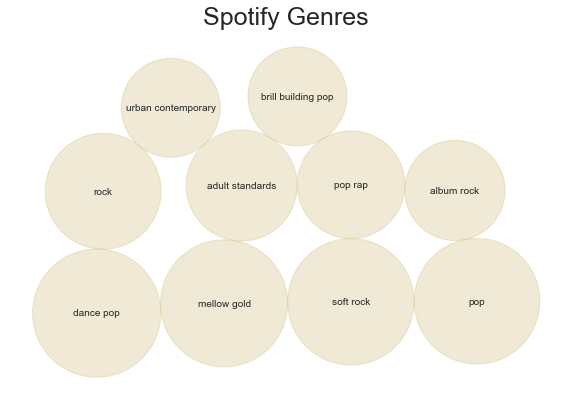

In [41]:
cycol = cycle('y')
#cycol = iter(list(np.random.choice(range(256), size=3)))
#cycol = np.random.choice(range(256), size=3)
            
bubble_chart = BubbleChart(area=trial['SongID'][:10], bubble_spacing=0)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(10,10))

#plt.figure(figsize=(15,10))

bubble_chart.plot(
    ax, trial['Genres'][:10])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Spotify Genres', fontsize=25)

plt.show();